# The Shockley-Quiesser Limit
TODO also explain the physics here (in Markdown), using mostly Jenny Nelson's book
TODO also explain the Julia (first time learning it as well)

Import necessary packages

In [1]:
using DelimitedFiles
using Plots
using NumericalIntegration
using Interpolations

Define relevant physical constants, and introduce values we will use 

In [2]:
h = 6.62607004e-34   # m^2 kg /s
c = 2.99792458e8 # m/s 
q = 1.6021766208e-19 # C
kB = 1.38064852e-23 # m^2 kg /s^2 /K
eV = 1.6021766208e-19 # J

Tcell = 300 # assume in equilibrium with the ambient 

300

Read AM1.5 data, downloaded [here](https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html) and interpolate using the Interpolations package. 

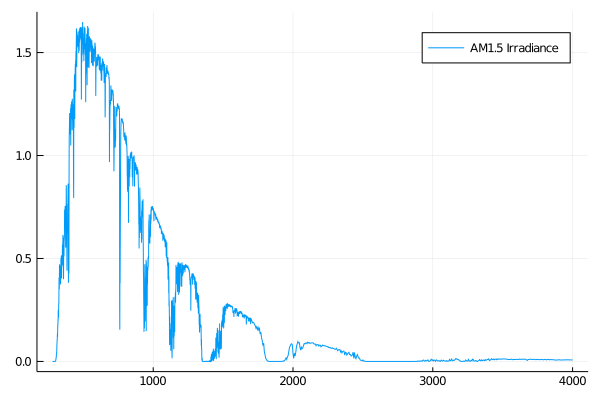

1000.3706555734398

In [3]:
am15 = readdlm("astmg173.csv", ',', Float64, '\n', skipstart=2);
λ = am15[:,1];
irrad = am15[:,3]; # irradiance (intensity) W /m^2 /nm

# interpolate
I=interpolate((λ,),irrad,Gridded(Linear()));
p=plot(λ, I(λ), label="AM1.5 Irradiance")
display(p)

# determine band gap energy range
Es = LinRange(1240/maximum(λ), 1240/minimum(λ), 1000)

# checking normalisation
print(integrate(λ, I(λ)))

# can filter data to be a certain range 
# plot(λ[λ.>1000], I(λ[λ.>1000]))

Since $E=\frac{hc}{\lambda}$, we can obtain the photon flux density. 

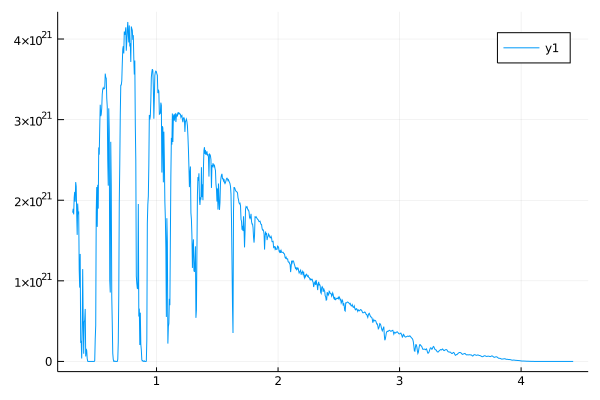

In [4]:
# h*c / eV = 1240 nm
λdB = 1240 ./ Es 
# photon flux per energy (also change units) # 1 / m^2 / eV / s
# [I] = W /m^2 /nm
# [Es] = eV
# [hc] = eV nm
γ = I(λdB) ./Es * 1240 ./ Es.^2 / eV #/ 1e9
# γ = W / m^2 /nm / eV * eV nm / eV^2 / eV
#   = W / m^2 / eV
display(plot(Es, γ))

The short-circuit current density is
$$
J_{\rm sc} = q\int_{E_g}^\infty {\rm d}Eb_s(E)Q_E(E) = q\int_{E_g}^\infty {\rm d}E\gamma(E)
$$
for an ideal cell. I used notation such that $\gamma=b_s$ (Jenny Nelson's notation).

We also have (TODO: explain origin)
$$
J_0 = q\frac{2F_a}{h^3c^2}\int_{E_g}^\infty {\rm d}E \frac{E^2}{e^{E/k_BT_{\rm cell}}-1}
$$
where $F_a=\pi$ in the ideal case (normal incidence of all rays). 

Finally, 
$$
J = J_{\rm sc} - J_0(e^{qV/k_BT}-1)
$$

In [67]:
# for a given band gap Eg, define the function Jsc
Jsc(Eg) = q*integrate(Es[Es.>=Eg], γ[Es.>=Eg]) * 0.1 # 0.1 converts A/m^2 to mA/cm^2
function J0(Eg) 
    E = Es[Es.>=Eg];
    integrand = q*2*π * eV / h^3 / c^2 * (E*eV).^2 ./ (exp.(E.*eV./kB./Tcell).-1);
    integrate(E, integrand)*0.1
    # C * eV / eV / nm / m^2 /kg *s * eV^2
    # C * nm / m^2 / kg * s * eV^2
end
# J0(1)
# Jsc(1)
J(Eg, V) = Jsc(Eg).-J0(Eg).*(exp(q.*V./kB./Tcell).-1)
Voc(Eg) = kB*Tcell / q * log.(Jsc(Eg)./J0(Eg));

In [69]:
# V is from 0 to V_oc 
# for now just use 0 to E_g
for Eg in Es
    Vs = LinRange(0, Eg, 1000)
#     J(Eg,Vs)
#     for V=0:0.001:Eg
#         d
#     end
end
# Vs = LinRange(0, Es)

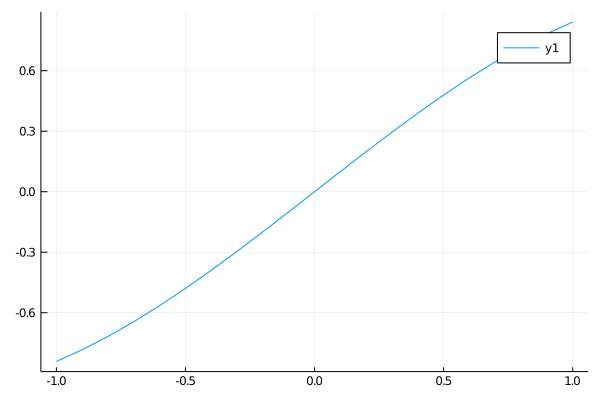

-4.163336342344337e-17

In [7]:

# 3:10
x = collect(-1:0.1:1)
l = size(x)[1]
y = sin.(x)
# y = abs.(x)
# y = rand(size(x)[1]) # These are the plotting data
p = plot(x, y)
display(p)
# integrate
integrate(x,y)